# Interpolation

In [2]:
using Interpolations
include("./ScalarField.jl");

In [6]:
dx=0.001
x = range(round(0.0,digits=10), stop=1, step=dx)
length(x)

1001

In [7]:
y=[0.0, 2.0465327520402092e-12, 1.0336379858207621e-11, 2.88121164789235e-11, 6.243728250247276e-11, 1.1728199364049604e-10, 2.006127946227199e-10, 3.2098710152121477e-10, 4.883523527449473e-10, 7.141500436167226e-10, 1.0114248074617286e-9, 1.3949387143064828e-9, 1.881290959997736e-9, 2.4890431223515564e-9, 3.238850163980583e-9, 4.15359736467881e-9, 5.258543369334536e-9, 6.5814695403969595e-9, 8.152835806893347e-9, 1.0005943204887389e-8, 1.2177103307071784e-8, 1.4705814741891786e-8, 1.7634947005191523e-8, 2.1010931769851606e-8, 2.4883961901234894e-8, 2.930819838846614e-8, 3.4341985403630326e-8, 4.004807370287173e-8, 4.649385258509956e-8, 5.375159062554418e-8, 6.189868540274741e-8, 7.101792243869872e-8, 8.119774357273136e-8, 9.253252499045649e-8, 1.0512286512942253e-7, 1.190758826833284e-7, 1.3450552492647534e-7, 1.5153288657969915e-7, 1.7028653943826482e-7, 1.9090287298111208e-7, 2.1352644617939732e-7, 2.3831035072046544e-7, 2.654165858611869e-7, 2.950164451219921e-7, 3.272909150299074e-7, 3.624310861154275e-7, 4.006385763641212e-7, 4.421259673194523e-7, 4.871172530283712e-7, 5.358483020157834e-7, 5.885673324680036e-7, 6.455354007987384e-7, 7.070269037639756e-7, 7.733300942843917e-7, 8.447476111254687e-7, 9.215970225764414e-7, 1.0042113842594371e-6, 1.0929398111897005e-6, 1.1881480641965938e-6, 1.2902191508031051e-6, 1.3995539406488566e-6, 1.516571795528052e-6, 1.6417112140994261e-6, 1.7754304913100174e-6, 1.9182083925584726e-6, 2.070544842606556e-6, 2.232961629229584e-6, 2.4060031215775936e-6, 2.590237003199144e-6, 2.786255019658769e-6, 2.9946737406571425e-6, 3.2161353365400532e-6, 3.4513083690582073e-6, 3.700888596214718e-6, 3.9655997910108534e-6, 4.24619457387318e-6, 4.543455258516642e-6, 4.858194710968322e-6, 5.191257221445647e-6, 5.543519388750573e-6, 5.9158910168078255e-6, 6.30931602294055e-6, 6.7247733574407225e-6, 7.163277933954386e-6, 7.625881570163196e-6, 8.113673938203836e-6, 8.627783524225641e-6, 9.169378596444232e-6, 9.739668181005025e-6, 1.0339903044925276e-5, 1.0971376685336725e-5, 1.1635426324202987e-5, 1.2333433907636582e-5, 1.3066827108889864e-5, 1.3837080334042242e-5, 1.46457157293528e-5, 1.5494304189192906e-5, 1.6384466363417574e-5, 1.7317873662977277e-5, 1.82962492625135e-5, 1.9321369098621936e-5, 2.0395062862406324e-5, 2.1519214984884233e-5, 2.2695765613743012e-5, 2.392671157988013e-5, 2.521410735209709e-5, 2.6560065978250105e-5, 2.7966760011093762e-5, 2.943642241698621e-5, 3.097134746555584e-5, 3.257389159836022e-5, 3.424647427449825e-5, 3.599157879106601e-5, 3.781175307627603e-5, 3.970961045298868e-5, 4.16878303703326e-5, 4.374915910101999e-5, 4.589641040189058e-5, 4.813246613514713e-5, 5.046027684767351e-5, 5.288286230575612e-5, 5.5403311982458664e-5, 5.802478549483084e-5, 6.07505129880626e-5, 6.35837954636278e-5, 6.652800504839443e-5, 6.9586585201613e-5, 7.276305085663164e-5, 7.606098849412325e-5, 7.948405614355117e-5, 8.303598330954099e-5, 8.672057081977114e-5, 9.054169059094161e-5, 9.450328530933032e-5, 9.860936802239964e-5, 0.00010286402163787179, 0.00010727139832665208, 0.00011183571882594285, 0.00011656127163885885, 0.00012145241212682757, 0.00012651356149103528, 0.00013174920563916188, 0.00013716389393363546, 0.00014276223781763096, 0.0001485489093150364, 0.00015452863940061679, 0.00016070621623661717, 0.00016708648327206683, 0.00017367433720107285, 0.00018047472577642599, 0.00018749264547488482, 0.00019473313901055477, 0.00020220129269283869, 0.000209902233625505, 0.00021784112674349765, 0.000226023171684201, 0.00023445359948997117, 0.00024313766913885518, 0.00025208066390053954, 0.0002612878875147018, 0.0002707646601890818, 0.0002805163144147457, 0.0002905481905961835, 0.00030086563249406113, 0.0003114739824786441, 0.0003223785765921146, 0.00033358473941822716, 0.0003450977787579826, 0.00035692298011025, 0.0003690656009565296, 0.00038153086484933146, 0.00039432395530393565, 0.000407450009493613, 0.00042091411174870826, 0.0004347212868603303, 0.00044887649318975, 0.000463384615584981, 0.00047825045810640627, 0.0004934787365637202, 0.0005090740708668769, 0.0005250409771941749, 0.00054138385998106, 0.0005581070037337022, 0.0005752145646718862, 0.0005927105622062581, 0.000610598870255491, 0.0006288832084094622, 0.000647567132945087, 0.0006666540277020144, 0.000686147094825972, 0.0007060493453881332, 0.0007263635898894918, 0.0007470924286598418, 0.0007682382421615928, 0.000789803181209294, 0.0008117891571163894, 0.0008341978317813912, 0.0008570306077263298, 0.000880288618101016, 0.000903972716667339, 0.0009280834677785147, 0.0009526211363688952, 0.0009775856779706503, 0.001002976728774333, 0.001028793595751042, 0.0010550352468545988, 0.001081700301322847, 0.0011087870200978866, 0.0011362932963857313, 0.0011642166463765647, 0.0011925542001474366, 0.001221302692769899, 0.0012504584556457246, 0.001280017408094473, 0.001309975049217286, 0.0013403264500618703, 0.0013710662461141976, 0.0014021886301429812, 0.001433687345423506, 0.0014655556793678574, 0.0014977864575890407, 0.0015303720384268955, 0.001563304307964064, 0.0015965746755606089, 0.0016301740699361466, 0.001664092935828597, 0.0016983212312588274, 0.0017328484254305956, 0.0017676634972952584, 0.0018027549348107244, 0.001838110734924069, 0.0018737184043071038, 0.0019095649608739992, 0.0019456369361097938, 0.001981920378238275, 0.002018400856257297, 0.0020550634648690918, 0.0020918928303325494, 0.002128873117263749, 0.002165988036410269, 0.0022032208534239384, 0.0022405543986557253, 0.002277971077995418, 0.002315452884777587, 0.0023529814127740615, 0.0023905378702917895, 0.0024281030953934904, 0.002465657572256917, 0.0025031814486868734, 0.0025406545547923282, 0.0025780564228390715, 0.002615366308286323, 0.002652563212013597, 0.002689625903741862, 0.0027265329466507073, 0.0027632627231907398, 0.0027997934620878845, 0.0028361032665335656, 0.0028721701435519688, 0.0029079720345326883, 0.002943486846914075, 0.0029786924869995017, 0.0030135668938855932, 0.003048088074478169, 0.003082234139568305, 0.0031159833409374624, 0.003149314109457112, 0.0031822050941446955, 0.0032146352021341067, 0.003246583639515161, 0.0032780299529927602, 0.0033089540723126613, 0.0033393363533969094, 0.003369157622128144, 0.0033983992187181073, 0.0034270430425918045, 0.003455071597714889, 0.0034824680382879937, 0.003509216214727899, 0.0035353007198516374, 0.0035607069351759084, 0.0035854210772405053, 0.0036094302438608727, 0.0036327224602114134, 0.003655286724637787, 0.003677113054093178, 0.003698192529090381, 0.0037185173380585904, 0.0037380808209909644, 0.003756877512266433, 0.00377490318252678, 0.0037921548794878435, 0.0038086309675616965, 0.003824331166164955, 0.003839256586586893, 0.0038534097672898735, 0.0038667947075137154, 0.003879416899055046, 0.003891283356092441, 0.0039024026429282568, 0.003912784899518499, 0.003922441864662902, 0.003931386896728598, 0.003939634991782345, 0.0039472027990082965, 0.003954108633290732, 0.003960372484843992, 0.003966016025775191, 0.003971062613468989, 0.003975537290687922, 0.003979466782286412, 0.003982879488441719, 0.003985805474310667, 0.0039882764560270085, 0.003990325782960837, 0.003991988416168422, 0.003993300902968269, 0.003994301347587149, 0.003995029377828152, 0.003995526107721639, 0.003995834096129175, 0.003995997301280182, 0.003996061031231078, 0.003996071890247114, 0.003996077721117902, 0.003996127543428783, 0.003996271487821641, 0.0039965607262905205, 0.003997047398569463, 0.003997784534682198, 0.003998825973735847, 0.004000226279053418, 0.004002040649752648, 0.004004324828891653, 0.004007135008314775, 0.004010527730344952, 0.004014559786481908, 0.004019288113278279, 0.004024769685578545, 0.004031061407318208, 0.004038220000092998, 0.004046301889720002, 0.004055363091024327, 0.004065459091096361, 0.004076644731275623, 0.004088974088127704, 0.004102500353690762, 0.0041172757152774, 0.0041333512351265185, 0.004150776730207752, 0.004169600652488435, 0.004189869969979539, 0.004211630048882707, 0.0042349245371652786, 0.0042597952498940675, 0.0042862820566614964, 0.004314422771439552, 0.004344253045197805, 0.004375806261621426, 0.004409113436263686, 0.004444203119464822, 0.004481101303365395, 0.004519831333337234, 0.004560413824148884, 0.00460286658117502, 0.004647204526950594, 0.004693439633360557, 0.00474158085974483, 0.004791634097185751, 0.0048436021192316565, 0.004897484539295339, 0.004953277774950183, 0.005010975019329566, 0.005070566219816859, 0.005132038064194021, 0.0051953739743963966, 0.0052605541080000115, 0.005327555367545418, 0.005396351417779049, 0.005466912710869207, 0.005539206519629256, 0.005613196978755432, 0.005688845134061025, 0.005766108999662553, 0.005844943623047114, 0.005925301157923433, 0.006007130944732301, 0.00609037959866527, 0.006174991105013735, 0.006260906921643996, 0.006348066088367654, 0.006436405342950924, 0.006525859243481197, 0.006616360296784617, 0.00670783909256465, 0.0068002244429087545, 0.006893443526788378, 0.006987422039156769, 0.007082084344229633, 0.0071773536325154515, 0.00727315208114563, 0.0073694010170394664, 0.007466021082425396, 0.007562932402228192, 0.00766005475282179, 0.007757307731639276, 0.007854610927125406, 0.007951884088512802, 0.008049047294900842, 0.008146021123116132, 0.008242726813835534, 0.008339086435456786, 0.008435023045208075, 0.008530460846996286, 0.008625325345504137, 0.008719543496059017, 0.00881304384981092, 0.008905756693773548, 0.008997614185301138, 0.009088550480594069, 0.009178501856848442, 0.009267406827688793, 0.009355206251548563, 0.009441843432689938, 0.009527264214583048, 0.009611417065394059, 0.009694253155362409, 0.009775726425879072, 0.009855793650110163, 0.009934414485043331, 0.010011551514867932, 0.010087170285633938, 0.010161239331168564, 0.010233730190263704, 0.01030461741518111, 0.010373878571555825, 0.010441494229811358, 0.01050744794823247, 0.010571726247872863, 0.010634318579505623, 0.010695217282853506, 0.010754417538364239, 0.010811917311822523, 0.01086771729211546, 0.010921820822491367, 0.01097423382567349, 0.011024964723209576, 0.011074024349455975, 0.011121425860610282, 0.011167184639219934, 0.011211318194605299, 0.011253846059644645, 0.011294789684375058, 0.011334172326867661, 0.011372018941837607,

 0.01140835606744911, 0.011443211710773341, 0.01147661523235245, 0.011508597230316194, 0.011539189424488866, 0.011568424540913462, 0.011596336197207284, 0.011622958789148779, 0.011648327378879235, 0.011672477585085288, 0.011695445475509044, 0.011717267462112269, 0.011737980199199501, 0.011757620484782447, 0.011776225165444599, 0.01179383104494097, 0.011810474796743239, 0.011826192880715588, 0.011841021464081388, 0.011854996346815541, 0.011868152891572213, 0.01188052595823268, 0.011892149843133502, 0.011903058223011185, 0.01191328410367611, 0.011922859773405847, 0.011931816761026276, 0.011940185798628142, 0.01194799678884701, 0.01195527877661606, 0.011962059925283914, 0.011968367496973678, 0.011974227837044799, 0.011979666362506108, 0.011984707554216621, 0.011989374952700313, 0.0119936911573922, 0.0119976778291256, 0.012001355695664412, 0.012004744560079699, 0.012007863311766566, 0.012010729939895494, 0.012013361549091665, 0.012015774377136447, 0.012017983814487026, 0.012020004425413034, 0.012021849970552997, 0.012023533430698246, 0.012025067031617704, 0.012026462269743441, 0.012027729938544122, 0.012028880155421242, 0.01202992238897142, 0.012030865486466695, 0.012031717701413959, 0.012032486721063931, 0.012033179693749667, 0.012033803255944211, 0.01203436355893666, 0.012034866295035522, 0.012035316723217785, 0.012035719694151402, 0.012036079674528055, 0.012036400770651873, 0.012036686751238293, 0.012036941069385411, 0.012037166883687937, 0.012037367078471193, 0.012037544283129496, 0.012037700890559703, 0.012037839074686635, 0.01203796080708261, 0.012038067872688255, 0.01203816188464634, 0.01203824429826436, 0.012038316424125178, 0.01203837944036815, 0.01203843440416583, 0.012038482262423596, 0.01203852386173138, 0.012038559957598163, 0.012038591223001022, 0.012038618256281242, 0.012038641588420568, 0.012038661689730775, 0.01203867897598974, 0.012038693814056875, 0.012038706527000318, 0.012038717398767548, 0.012038726678430353, 0.01203873458403405, 0.0120387413060798, 0.012038747010667773, 0.012038751842327566, 0.012038755926561149, 0.01203875937212218, 0.012038762273054277, 0.012038764710509455, 0.012038766754366645, 0.01203876846466884, 0.012038769892896208, 0.012038771083091168, 0.01203877207285029, 0.012038772894196668, 0.012038773574345305, 0.012038774136373009, 0.012038774599803272, 0.012038774981115665, 0.01203877529418839, 0.012038775550681804, 0.012038775760369949, 0.012038775931426425, 0.012038776070670252, 0.012038776183776785, 0.01203877627545819, 0.01203877634961747, 0.01203877640947956, 0.012038776457702636, 0.012038776496472347, 0.012038776527581408, 0.012038776552496619, 0.012038776572415156, 0.012038776588311727, 0.012038776600977954, 0.012038776611055195, 0.012038776619061792, 0.012038776625415653, 0.012038776630452903, 0.01203877663444325, 0.012038776637602609, 0.01203877664010343, 0.01203877664208315, 0.012038776643651066, 0.012038776644893919, 0.012038776645880416, 0.012038776646664879, 0.012038776647290186, 0.012038776647790133, 0.012038776648191323, 0.01203877664851467, 0.012038776648776608, 0.01203877664899004, 0.012038776649165094, 0.012038776649309725, 0.01203877664943018, 0.01203877664953137, 0.012038776649617161, 0.012038776649690601, 0.012038776649754099, 0.012038776649809563, 0.01203877664985851, 0.012038776649902147, 0.01203877664994144, 0.012038776649977165, 0.012038776650009946, 0.012038776650040288, 0.012038776650068602, 0.012038776650095222, 0.01203877665012042, 0.012038776650144422, 0.012038776650167412, 0.012038776650189542, 0.012038776650210938, 0.012038776650231705, 0.012038776650251926, 0.012038776650271676, 0.012038776650291015, 0.012038776650309991, 0.012038776650328646, 0.012038776650347015, 0.012038776650365126, 0.012038776650383002, 0.012038776650400663, 0.012038776650418127, 0.012038776650435406, 0.012038776650452514, 0.012038776650469459, 0.012038776650486247, 0.012038776650502889, 0.012038776650519388, 0.012038776650535748, 0.012038776650551974, 0.012038776650568071, 0.01203877665058404, 0.012038776650599886, 0.012038776650615608, 0.012038776650631208, 0.01203877665064669, 0.012038776650662055, 0.012038776650677303, 0.012038776650692437, 0.012038776650707456, 0.012038776650722362, 0.012038776650737158, 0.012038776650751842, 0.012038776650766417, 0.012038776650780883, 0.012038776650795242, 0.012038776650809492, 0.012038776650823637, 0.012038776650837676, 0.012038776650851611, 0.012038776650865442, 0.01203877665087917, 0.012038776650892794, 0.012038776650906318, 0.012038776650919741, 0.012038776650933064, 0.012038776650946287, 0.012038776650959412, 0.012038776650972438, 0.012038776650985367, 0.012038776650998199, 0.012038776651010935, 0.012038776651023576, 0.012038776651036124, 0.012038776651048577, 0.012038776651060937, 0.012038776651073205, 0.012038776651085381, 0.012038776651097465, 0.012038776651109459, 0.012038776651121363, 0.012038776651133178, 0.012038776651144903, 0.012038776651156541, 0.012038776651168091, 0.012038776651179554, 0.012038776651190932, 0.012038776651202223, 0.01203877665121343, 0.012038776651224553, 0.012038776651235593, 0.012038776651246549, 0.012038776651257422, 0.012038776651268214, 0.012038776651278924, 0.012038776651289553, 0.012038776651300102, 0.01203877665131057, 0.01203877665132096, 0.012038776651331271, 0.012038776651341504, 0.01203877665135166, 0.012038776651361738, 0.01203877665137174, 0.012038776651381667, 0.012038776651391518, 0.012038776651401293, 0.012038776651410996, 0.012038776651420623, 0.012038776651430178, 0.01203877665143966, 0.01203877665144907, 0.012038776651458407, 0.012038776651467674, 0.01203877665147687, 0.012038776651485995, 0.01203877665149505, 0.012038776651504036, 0.012038776651512952, 0.012038776651521801, 0.012038776651530582, 0.012038776651539296, 0.012038776651547942, 0.012038776651556522, 0.012038776651565036, 0.012038776651573484, 0.012038776651581866, 0.012038776651590184, 0.012038776651598438, 0.012038776651606627, 0.012038776651614753, 0.012038776651622816, 0.012038776651630816, 0.012038776651638754, 0.01203877665164663, 0.012038776651654445, 0.0120387766516622, 0.012038776651669893, 0.012038776651677525, 0.0120387766516851, 0.012038776651692614, 0.01203877665170007, 0.012038776651707467, 0.012038776651714805, 0.012038776651722085, 0.012038776651729309, 0.012038776651736475, 0.012038776651743585, 0.012038776651750639, 0.012038776651757637, 0.012038776651764579, 0.012038776651771466, 0.012038776651778299, 0.012038776651785077, 0.0120387766517918, 0.01203877665179847, 0.012038776651805088, 0.012038776651811653, 0.012038776651818165, 0.012038776651824625, 0.012038776651831033, 0.012038776651837389, 0.012038776651843693, 0.012038776651849947, 0.01203877665185615, 0.012038776651862303, 0.012038776651868406, 0.01203877665187446, 0.012038776651880464, 0.01203877665188642, 0.012038776651892326, 0.012038776651898184, 0.012038776651903995, 0.012038776651909758, 0.012038776651915474, 0.012038776651921143, 0.012038776651926765, 0.01203877665193234, 0.012038776651937871, 0.012038776651943355, 0.012038776651948793, 0.012038776651954186, 0.012038776651959534, 0.012038776651964837, 0.012038776651970097, 0.012038776651975312, 0.012038776651980483, 0.01203877665198561, 0.012038776651990695, 0.012038776651995738, 0.012038776652000737, 0.012038776652005695, 0.01203877665201061, 0.012038776652015483, 0.012038776652020314, 0.012038776652025103, 0.012038776652029853, 0.012038776652034561, 0.01203877665203923, 0.012038776652043857, 0.012038776652048446, 0.012038776652052994, 0.012038776652057503, 0.012038776652061973, 0.012038776652066404, 0.012038776652070796, 0.01203877665207515, 0.012038776652079466, 0.012038776652083744, 0.012038776652087984, 0.012038776652092185, 0.01203877665209635, 0.012038776652100479, 0.01203877665210457, 0.012038776652108623, 0.012038776652112641, 0.012038776652116624, 0.01203877665212057, 0.012038776652124482, 0.012038776652128358, 0.012038776652132198, 0.012038776652136004, 0.012038776652139776, 0.012038776652143512, 0.012038776652147214, 0.012038776652150881, 0.012038776652154515, 0.012038776652158117, 0.012038776652161683, 0.012038776652165217, 0.012038776652168718, 0.012038776652172185, 0.01203877665217562, 0.012038776652179024, 0.012038776652182394, 0.012038776652185734, 0.012038776652189042, 0.012038776652192317, 0.01203877665219556, 0.012038776652198773, 0.012038776652201955, 0.012038776652205107, 0.012038776652208228, 0.012038776652211319, 0.012038776652214379, 0.01203877665221741, 0.01203877665222041, 0.012038776652223382, 0.012038776652226324, 0.012038776652229237, 0.01203877665223212, 0.012038776652234974, 0.0120387766522378, 0.012038776652240596, 0.012038776652243365, 0.012038776652246105, 0.012038776652248817, 0.0120387766522515, 0.012038776652254156, 0.012038776652256786, 0.012038776652259388, 0.012038776652261962, 0.01203877665226451, 0.012038776652267031, 0.012038776652269526, 0.012038776652271994, 0.012038776652274435, 0.01203877665227685, 0.012038776652279239, 0.012038776652281601, 0.01203877665228394, 0.012038776652286252, 0.012038776652288538, 0.0120387766522908, 0.012038776652293037, 0.012038776652295248, 0.012038776652297436, 0.012038776652299597, 0.012038776652301734, 0.012038776652303847, 0.012038776652305936, 0.012038776652308002, 0.012038776652310044, 0.012038776652312061, 0.012038776652314056, 0.012038776652316027, 0.012038776652317975, 0.012038776652319899, 0.0120387766523218, 0.012038776652323679, 0.012038776652325535, 0.012038776652327369, 0.01203877665232918, 0.012038776652330968, 0.012038776652332734, 0.01203877665233448, 0.012038776652336202, 0.012038776652337903, 0.012038776652339583, 0.012038776652341241, 0.012038776652342877, 0.012038776652344492, 0.012038776652346086, 0.01203877665234766, 0.012038776652349212, 0.012038776652350744, 0.012038776652352255, 0.012038776652353745, 0.012038776652355216, 0.012038776652356666, 0.012038776652358096, 0.012038776652359506, 0.012038776652360896, 0.012038776652362266, 0.012038776652363617, 0.012038776652364948, 0.01203877665236626, 0.012038776652367552, 0.012038776652368825, 0.012038776652370079, 0.012038776652371314, 0.01203877665237253, 0.012038776652373729, 0.012038776652374909, 0.012038776652376069, 0.012038776652377212, 0.012038776652378336, 0.012038776652379443,

 0.01203877665238053, 0.012038776652381601, 0.012038776652382654, 0.01203877665238369, 0.012038776652384708, 0.012038776652385709, 0.012038776652386693, 0.012038776652387659, 0.012038776652388608, 0.01203877665238954, 0.012038776652390453, 0.01203877665239135, 0.012038776652392232, 0.012038776652393095, 0.012038776652393944, 0.012038776652394775, 0.01203877665239559, 0.012038776652396388, 0.01203877665239717, 0.012038776652397937, 0.012038776652398688, 0.012038776652399422, 0.01203877665240014, 0.012038776652400843, 0.01203877665240153, 0.012038776652402201, 0.012038776652402858, 0.0120387766524035, 0.012038776652404127, 0.012038776652404737, 0.012038776652405334, 0.012038776652405915, 0.01203877665240648, 0.012038776652407032, 0.012038776652407568, 0.01203877665240809, 0.012038776652408599, 0.012038776652409091, 0.01203877665240957, 0.012038776652410035, 0.012038776652410486, 0.012038776652410923, 0.012038776652411346, 0.012038776652411756, 0.012038776652412151, 0.012038776652412533, 0.0120387766524129, 0.012038776652413255, 0.012038776652413595, 0.012038776652413923, 0.012038776652414237, 0.012038776652414537, 0.012038776652414825, 0.012038776652415099, 0.01203877665241536, 0.012038776652415609, 0.012038776652415845, 0.012038776652416067, 0.012038776652416277, 0.012038776652416474, 0.01203877665241666, 0.012038776652416832, 0.012038776652416991, 0.012038776652417139, 0.012038776652417274, 0.012038776652417397, 0.012038776652417508, 0.012038776652417607, 0.012038776652417694, 0.01203877665241777, 0.012038776652417834, 0.012038776652417886, 0.012038776652417926, 0.012038776652417956, 0.012038776652417973, 0.012038776652417978]

1001-element Vector{Float64}:
 0.0
 2.0465327520402092e-12
 1.0336379858207621e-11
 2.88121164789235e-11
 6.243728250247276e-11
 1.1728199364049604e-10
 2.006127946227199e-10
 3.2098710152121477e-10
 4.883523527449473e-10
 7.141500436167226e-10
 1.0114248074617286e-9
 1.3949387143064828e-9
 1.881290959997736e-9
 ⋮
 0.012038776652417274
 0.012038776652417397
 0.012038776652417508
 0.012038776652417607
 0.012038776652417694
 0.01203877665241777
 0.012038776652417834
 0.012038776652417886
 0.012038776652417926
 0.012038776652417956
 0.012038776652417973
 0.012038776652417978

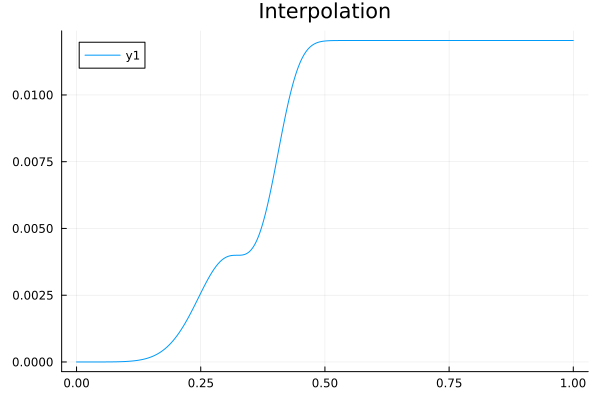

In [8]:
using Plots #showing initial data and the initial status of the horizon finder
plot(x, y,title="Interpolation")

In [10]:
using Interpolations

itp = cubic_spline_interpolation(x, y,  extrapolation_bc = Line()) # create interpolation function
#itp(9) # call function on input data (use itp.(x) to broadcast over input vector)

0.012038776652445734

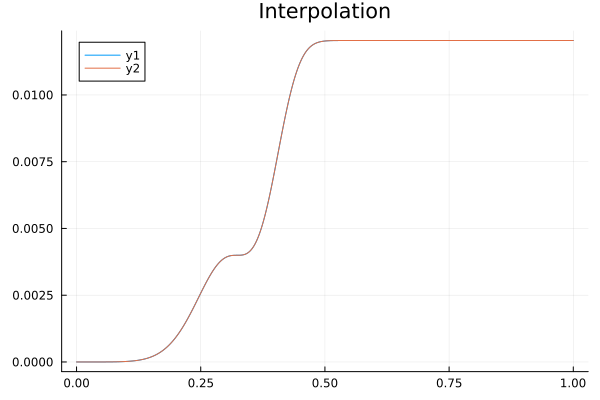

In [11]:
using Plots #showing initial data and the initial status of the horizon finder
plot(x, [y itp(x)],title="Interpolation")

In [147]:
N=3
x=zeros(N);
y=zeros(N);

x=[1.1, 2.8, 4.7]
x1=[1.1, 2.8, 4.8]
y=[1.5, 4.3, 16.1]

data=[x y];


using Interpolations
data[:,1]=x
data[:,2]=y
itp = cubic_spline_interpolation(10:12, 10:12,  extrapolation_bc = Line()) # create interpolation function
itp(9) # call function on input data (use itp.(x) to broadcast over input vector)

8.999999999999998

In [148]:
itp.([9, 8, 1])

3-element Vector{Float64}:
 8.999999999999998
 7.9999999999999964
 0.999999999999984

In [79]:
itp2 = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())
itp2.(R)

207-element Vector{Float64}:
 -2.2492802065157096e-5
 -1.49952013767714e-5
 -7.4976006883857e-6
 -4.235164736271502e-22
  7.689629700730104e-6
  1.6552824829107725e-5
  2.7892775217897982e-5
  4.327954001763802e-5
  6.470230120446899e-5
  9.474349404271483e-5
  0.00013678076996669706
  0.00019522129280422345
  0.0002757706956599848
  ⋮
 -2.01566457731864e-39
 -5.719520396176462e-40
 -1.6084935678107224e-40
 -4.483299003815029e-41
 -1.238497196306582e-41
 -3.3908734463825724e-42
 -9.201267173992415e-43
 -2.4745912801619788e-43
 -6.595980413957055e-44
  4.924866297391118e-44
  1.644571300873888e-43
  2.7966559720087055e-43

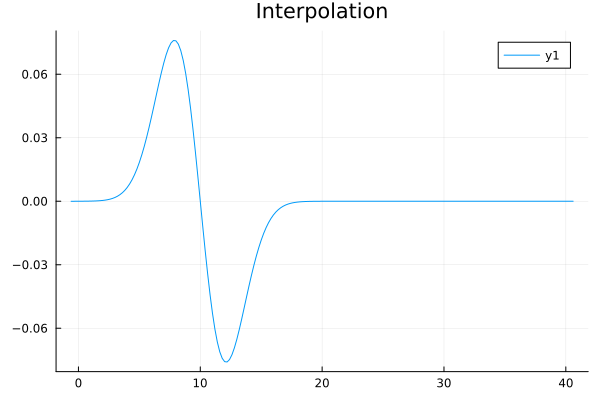

In [80]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, itp2.(R),title="Interpolation")

In [81]:
psi0=0
SFconstraint_psi_new(psi0,R1) = itp2.(R1)

integration = rungekutta4(SFconstraint_psi_new,psi0,R1)

201-element Vector{Float64}:
  0.0
  7.593615194557902e-7
  3.153733052908858e-6
  7.544874151946501e-6
  1.4579476734114407e-5
  2.5257454987628783e-5
  4.103276552659288e-5
  6.395174800239e-5
  9.683503246584859e-5
  0.00014350975614535846
  0.00020909900645941614
  0.0003003748605932674
  0.00042617989754202296
  ⋮
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6

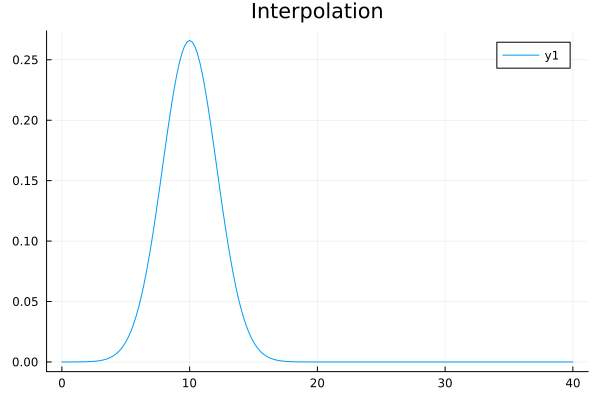

In [82]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R1, integration,title="Interpolation")

# New interpolation

In [78]:
using PyCall   

x = [0, 1, 3, 4, 5]

y = [0, 1, 2, 5, 5]

#sinterpolate = pyimport("interpolate")

scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

spl = scipyinterpolate.splrep(x,y,k=4)

x2 = [1, 2, 3, 4, 5]
y2 = scipyinterpolate.splev(x2, spl)



5-element Vector{Float64}:
 1.0
 0.4999999999999988
 1.9999999999999982
 4.999999999999998
 5.0

In [237]:
using Latexify
ex = :(z = 2 .* pi .* (1 ./ R1.^3 .- 1 ./ R1.^2) .* (state_array[int.(R1 ./ dx .+ 1),3] .+ (R1 .- 1) .* R1 .* state_array[int.(R1 ./ dx .+ 1),4]) .^2)
latexify(ex)

L"$z = 2 \cdot pi \cdot \left( \frac{1}{R1^{3}} - \frac{1}{R1^{2}} \right) \cdot \left( \mathrm{state}_{array}\left[\mathrm{int}\left( \frac{R1}{dx} + 1 \right), 3\right] + \left( R1 - 1 \right) \cdot R1 \cdot \mathrm{state}_{array}\left[\mathrm{int}\left( \frac{R1}{dx} + 1 \right), 4\right] \right)^{2}$"

Convergence tests on new interpolation

In [30]:
using PyCall   

x = [-1, 2, 4, 6, 8]

y = [-4, 4, 6, 3, -5]

scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

spl = scipyinterpolate.splrep(x,y,k=4)

x2_1 = [0, 4, 8, 12, 16]
y2_1 = scipyinterpolate.splev(x2_1, spl)

println("res1: ", y2_1)

x2_2 = [0, 2, 4, 6, 8, 10, 12, 14, 16]
y2_2 = scipyinterpolate.splev(x2_2, spl)

println("res2: ", y2_2)

x2_3 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y2_3 = scipyinterpolate.splev(x2_3, spl)

println("res3: ", y2_3)

diff_2_3=0
j=0
k=0
for i in y2_3
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("y_2_2[k] = ", y2_2[k])
        diff_2_3 += (i-y2_2[k])^2
        
    end
        
    j = j+1
end
println("")
println(diff_2_3)

res1: [-1.22222222222222, 6.0, -5.0, -27.111111111111175, -24.777777777778198]
res2: [-1.22222222222222, 4.0, 6.0, 3.0, -5.0, -16.222222222222236, -27.111111111111175, -32.33333333333352, -24.777777777778198]
res3: [-1.22222222222222, 1.611111111111112, 4.0, 5.555555555555555, 6.0, 5.166666666666666, 3.0, -0.4444444444444433, -5.0, -10.388888888888895, -16.222222222222236, -22.000000000000036, -27.111111111111175, -30.833333333333464, -32.33333333333352, -30.66666666666695, -24.777777777778198]
i = -1.22222222222222
y_2_2[k] = -1.22222222222222
i = 4.0
y_2_2[k] = 4.0
i = 6.0
y_2_2[k] = 6.0
i = 3.0
y_2_2[k] = 3.0
i = -5.0
y_2_2[k] = -5.0
i = -16.222222222222236
y_2_2[k] = -16.222222222222236
i = -27.111111111111175
y_2_2[k] = -27.111111111111175
i = -32.33333333333352
y_2_2[k] = -32.33333333333352
i = -24.777777777778198
y_2_2[k] = -24.777777777778198

0.0


In [31]:
diff_1_2=0
j=0
k=0
for i in y2_2
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("y_2_1[k] = ", y2_1[k])
        diff_1_2 += (i-y2_1[k])^2
        
    end
        
    j = j+1
end
println("")
println(diff_1_2)

i = -1.22222222222222
y_2_1[k] = -1.22222222222222
i = 6.0
y_2_1[k] = 6.0
i = -5.0
y_2_1[k] = -5.0
i = -27.111111111111175
y_2_1[k] = -27.111111111111175
i = -24.777777777778198
y_2_1[k] = -24.777777777778198

0.0


In [32]:
print(sqrt(diff_1_2/diff_2_3))

NaN

In [16]:
using PyCall   

cst=0


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

#x=[1,2,3,4,5,6,7,8]

x1 = [0, 4, 8, 12, 16]
y1 = [0, 16, 64, 144, 256]/100

spl1 = scipyinterpolate.splrep(x1, y1, k=4)
x_res1 = x1

constraint(cst,x)=scipyinterpolate.splev(x, spl1)
yy1 = rungekutta4(constraint,cst,x_res1)

x2 = [0, 2, 4, 6, 8, 10, 12, 14, 16]
y2 = [0, 4, 16, 36, 64, 100, 144, 196, 256]/100

spl2 = scipyinterpolate.splrep(x2, y2, k=4)
x_res2 = x2

constraint(cst,x)=scipyinterpolate.splev(x, spl2)
yy2 = rungekutta4(constraint,cst,x_res2)

x3= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y3 = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256]/100

spl3 = scipyinterpolate.splrep(x3, y3, k=4)
x_res3 = x3

constraint(cst,x) = scipyinterpolate.splev(x, spl3)
yy3 = rungekutta4(constraint,cst,x_res3)

17-element Vector{Float64}:
  0.0
  0.003333333333333327
  0.02666666666666666
  0.08999999999999997
  0.2133333333333333
  0.4166666666666667
  0.72
  1.1433333333333335
  1.706666666666667
  2.4300000000000006
  3.333333333333334
  4.436666666666667
  5.760000000000001
  7.323333333333334
  9.146666666666667
 11.25
 13.653333333333334

In [17]:
println(yy1)
println(yy2)
println(yy3)

[0.0, 0.21333333333333376, 1.7066666666666672, 5.76, 13.653333333333334]
[0.0, 0.02666666666666691, 0.21333333333333337, 0.7200000000000001, 1.7066666666666666, 3.333333333333333, 5.76, 9.146666666666667, 13.653333333333332]
[0.0, 0.003333333333333327, 0.02666666666666666, 0.08999999999999997, 0.2133333333333333, 0.4166666666666667, 0.72, 1.1433333333333335, 1.706666666666667, 2.4300000000000006, 3.333333333333334, 4.436666666666667, 5.760000000000001, 7.323333333333334, 9.146666666666667, 11.25, 13.653333333333334]


In [18]:
(21.333333333333314-21.33333333333333)^2+(170.66666666666666-170.66666666666663)^2+(576.0-576.0)^2+(1365.333333333333-1365.333333333333)^2

1.0097419586828951e-27

In [19]:
(2.6666666666666767-2.6666666666666665)^2+(21.33333333333333-21.333333333333325)^2 +(71.99999999999999-72.0)^2 + (170.66666666666663-170.66666666666669)^2 +(333.3333333333333-333.3333333333333)^2+ (576.0-576.0)^2 +(914.6666666666665-914.6666666666665)^2 +(1365.333333333333-1365.333333333333)^2

3.5500712887208584e-27

In [20]:
diff_1_2=0
j=0
k=0
for i in yy2
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("yy1[k] = ", yy1[k])
        diff_1_2 += (i-yy1[k])^2
        
    end
        
    j = j+1
end
println(" ")
println(diff_1_2)

i = 0.0
yy1[k] = 0.0
i = 0.21333333333333337
yy1[k] = 0.21333333333333376
i = 1.7066666666666666
yy1[k] = 1.7066666666666672
i = 5.76
yy1[k] = 5.76
i = 13.653333333333332
yy1[k] = 13.653333333333334
 
3.750170787710826e-30


In [21]:
diff_2_3=0
j=0
k=0
for i in yy3
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("yy2[k] = ", yy2[k])
        diff_2_3 += (i-yy2[k])^2
        
    end
        
    j = j+1
end
println("")
println(diff_2_3)

i = 0.0
yy2[k] = 0.0
i = 0.02666666666666666
yy2[k] = 0.02666666666666691
i = 0.2133333333333333
yy2[k] = 0.21333333333333337
i = 0.72
yy2[k] = 0.7200000000000001
i = 1.706666666666667
yy2[k] = 1.7066666666666666
i = 3.333333333333334
yy2[k] = 3.333333333333333
i = 5.760000000000001
yy2[k] = 5.76
i = 9.146666666666667
yy2[k] = 9.146666666666667
i = 13.653333333333334
yy2[k] = 13.653333333333332

5.0120400872733426e-30


In [22]:
print(sqrt(diff_1_2/diff_2_3))

0.8650042779436088

now with f(x)=sin(x)

In [48]:
using PyCall   

cst=0


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

#x=[1,2,3,4,5,6,7,8]

x1 = range(0, stop=1, step=0.1);
y1 = sin.(x1)/5

spl1 = scipyinterpolate.splrep(x1, y1, k=4)
x_res1 = x1

constraint(cst,x)=scipyinterpolate.splev(x, spl1)
yy1 = rungekutta4(constraint,cst,x_res1)

x2 = range(0, stop=1, step=0.05);
y2 = sin.(x2)/5

spl2 = scipyinterpolate.splrep(x2, y2, k=4)
x_res2 = x2

constraint(cst,x)=scipyinterpolate.splev(x, spl2)
yy2 = rungekutta4(constraint,cst,x_res2)

x3 = range(0, stop=1, step=0.025);
y3 = sin.(x3)/5

spl3 = scipyinterpolate.splrep(x3, y3, k=4)
x_res3 = x3

constraint(cst,x) = scipyinterpolate.splev(x, spl3)
yy3 = rungekutta4(constraint,cst,x_res3)

41-element Vector{Float64}:
 0.0
 6.249674432564504e-5
 0.00024994792067415035
 0.0005622363772049962
 0.0009991669441234254
 0.0015604665539306131
 0.002245784412683868
 0.003054692219014227
 0.003986684431879347
 0.005041178586481848
 0.00621751565830109
 0.00751496047495835
 0.008932702175676965
 ⋮
 0.050300115613173865
 0.05366222623209856
 0.05711579319614468
 0.0606586581383783
 0.06428860688353534
 0.06800337083181116
 0.0718006283766557
 0.07567800635571825
 0.07963308153395181
 0.08366338211818022
 0.08776638930154444
 0.09193953883866027

In [50]:
diff_1_2=0
j=0
k=0
for i in yy2
    
    if j%2==0
        k=k+1
        diff_1_2 += (i-yy1[k])^2
        
    end
        
    j = j+1
end

#println(diff_1_2)
diff_2_3=0
j=0
k=0
for i in yy3
    
    if j%2==0
        k=k+1
        diff_2_3 += (i-yy2[k])^2
        
    end
        
    j = j+1
end

#println(diff_2_3)

println(math.log2(diff_1_2/diff_2_3))

12.36906718463126


# Derivative

In [1]:
Der_new(m_func,X[4],4)

LoadError: UndefVarError: X not defined

In [2]:
Der(state_array,4,1) #derivative of m on the gridpoint X=0 <=> i=4

LoadError: UndefVarError: Der not defined

In [ ]:
for i in 4:L-3
    println(Der(state_array,i,1))
    println(Der_new(m_func,X[i],i))
    println("")
end

In [ ]:
for i in 4:L-3
    println(Der(state_array,i,2))
    println(Der_new(beta_func,X[i],i))
    println("")
end

# Building data for m

using data from previous slice

In [2]:
m0=0
initm[4:L-3]=rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

using Plots #showing initial data and the initial status of the horizon finder
plot(initX, ghost(initm), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

LoadError: UndefVarError: rk4wrapper not defined

using data that is updated within the slice

In [ ]:
m0=0
initmm=m_rk4wrapper(SFconstraint_m,m0,initX1,0,spl_funcs)
state_array[:,1]=initm;
state_array=ghost(state_array);

spl_m = scipyinterpolate.splrep(initX[4:L-3], state_array[4:L-3,1],k=4)
m_func(x) = scipyinterpolate.splev(x, spl_m)
spl_funcs[1] = m_func

using Plots #showing initial data and the initial status of the horizon finder
plot(initX1, initmm, xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

plotting both

In [ ]:
plot(initX1, [initmm initm[4:L-3]], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

In [1]:
plot(initX1, initmm-initm[4:L-3], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0.4, 1])

LoadError: UndefVarError: L not defined

# INterp tests

In [357]:
#aux2 = range(1,10,step=0.01/2)

In [358]:
#spl2 = scipyinterpolate.splrep(aux2, sin.(aux2),k=2)
func2 = cubic_spline_interpolation(x2, var2,  extrapolation_bc = Line());
#func2(x) = scipyinterpolate.splev(x, spl2)



LoadError: UndefVarError: x2 not defined

In [494]:
#aux4 = range(1,10,step=0.01/4)
#spl4 = scipyinterpolate.splrep(aux4, sin.(aux4),k=2)
func4 = cubic_spline_interpolation(x4, var4,  extrapolation_bc = Line());
#func4(x) = scipyinterpolate.splev(x, spl4)

In [508]:
using Plots #showing initial data and the initial status of the horizon finder
plotlyjs()
aux_test = range(0,1,step=0.001)

#plot(aux, [(abs.(func4(aux).-func2(aux))) abs.(func2(aux).-func(aux))], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0, 1])#,ylim=[0.001 1*10])
scatter(x4, [abs.((func4(x4).-func2(x4)))*16 abs.(func2(x4).-func(x4))], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, xlim=[0, 1])#,ylim=[0.001 1*10])



In [502]:
[x1 x2[1:2:length(x2)] x4[1:4:length(x4)]]

21×3 Matrix{Float64}:
 0.0   0.0   0.0
 0.05  0.05  0.05
 0.1   0.1   0.1
 0.15  0.15  0.15
 0.2   0.2   0.2
 0.25  0.25  0.25
 0.3   0.3   0.3
 0.35  0.35  0.35
 0.4   0.4   0.4
 0.45  0.45  0.45
 0.5   0.5   0.5
 0.55  0.55  0.55
 0.6   0.6   0.6
 0.65  0.65  0.65
 0.7   0.7   0.7
 0.75  0.75  0.75
 0.8   0.8   0.8
 0.85  0.85  0.85
 0.9   0.9   0.9
 0.95  0.95  0.95
 1.0   1.0   1.0

In [33]:
func(aux_test).-func2(aux_test)

101-element Vector{Float64}:
 -2.168404344971009e-19
  0.0
  6.938893903907228e-18
  1.3877787807814457e-17
 -1.3877787807814457e-17
  0.0
 -2.7755575615628914e-17
  5.551115123125783e-17
  2.7755575615628914e-17
  0.0
  5.551115123125783e-17
 -5.551115123125783e-17
  0.0
  ⋮
  5.551115123125783e-17
 -5.551115123125783e-17
 -5.551115123125783e-17
  5.551115123125783e-17
  5.551115123125783e-17
  0.0
  0.0
 -5.551115123125783e-17
  2.7755575615628914e-17
  2.7755575615628914e-17
  2.7755575615628914e-17
  0.0

In [519]:
T=collect(T)
T[8]

0.00035

In [498]:
T[7]

0.0006

In [499]:
T[8]-T[7]

0.00010000000000000005

In [500]:
round(T[8]-T[7],digits=8)

0.0001